In [1]:
if Sys.iswindows()
    username = "Alex"
    pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
    using Pkg
    Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
else
    username = "sergey"
    pathtorepo = "/home/" *username *"/work/repo/dynamical-systems"
    using Pkg
    Pkg.activate(pathtorepo * "/env/integrate/")
end

using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

  Activating project at `~/work/repo/dynamical-systems/env/integrate`


In [2]:
function plot_timeseries(sol, tstart, tend, indexs, labels)
    indexx, indexy = indexs
    labelx, labely = labels
    f = Figure(size = (1000, 250))
    ax = Axis(f[1,1], xlabel = labelx, ylabel = labely)
    lines!(ax, sol.t[tstart:tend], sol[indexx, tstart:tend], color = :red)
    lines!(ax, sol.t[tstart:tend], sol[indexy, tstart:tend], color = :green)
    display(GLMakie.Screen(), f)
end

function plot_phase_space(sol, tstart, tend, indexs, labels)
    indexx, indexy, indexz = indexs
    labelx, labely, labelz = labels
    f = Figure(size = (400, 400))
    ax = Axis3(f[1,1], xlabel = labelx, ylabel = labely, zlabel = labelz)
    lines!(ax, sol[indexx, tstart:tend], sol[indexy, tstart:tend], sol[indexz, tstart:tend])
    display(GLMakie.Screen(), f)
end

function FHN2_try3(u, p ,t)
    x1, y1, x2, y2, z= u
    ϵ, a, g, k, σ, α, k1, k2 = p

    I(ϕ_i) = g * (1.0/(1.0 + exp(k*(cos(σ/2) - cos(ϕ_i - α - σ/2)))))
    ρz = k1 + k2 * z ^ 2

    ϕ2 = atan(y2, x2)
    ϕ1 = atan(y1, x1)

    dx1dt = (x1 - x1 ^ 3 / 3 - y1 + I(ϕ2) + ρz * (x2 - x1) ) / ϵ
    dy1dt = x1 - a
    dx2dt = (x2 - x2 ^ 3 / 3 - y2 + I(ϕ1) + ρz * (x1 - x2) ) / ϵ
    dy2dt = x2 - a
    dzdt = x1 - x2
    return SVector(dx1dt, dy1dt, dx2dt, dy2dt, dzdt)
end

function FHN2_try3_params()
    ϵ = 0.01; a = -1.01;
    g = 0.1; k = 50.0; σ = 50.0 * pi / 180; α = 160.0 * pi / 180;
    k1 = 0.0; k2 = 0.0
    return [ ϵ, a, g, k, σ, α, k1, k2]
end

FHN2_try3_params (generic function with 1 method)

In [4]:
parameters = FHN2_try3_params()
parameters[7] = 0.09
parameters[8] = 0.0
tspan = (0.0, 2000)
x1, y1, x2, y2 = 0.5, -1.8, 0.5, 0.7
z = y1 - y2
u0 = SVector{5}([x1, y1, x2, y2, 0.0])
prob = ODEProblem(FHN2_try3, u0, tspan, parameters)
sol = solve(prob, DP8(), adaptive = true, abstol = 1e-11, reltol = 1e-11);

In [5]:
indexx, indexy, indexz = 1, 3, 4
labelx, labely, labelz = "x1", "x2", "y2"
ticksize = 25
labelsize = 40
lw = 2.0

2.0

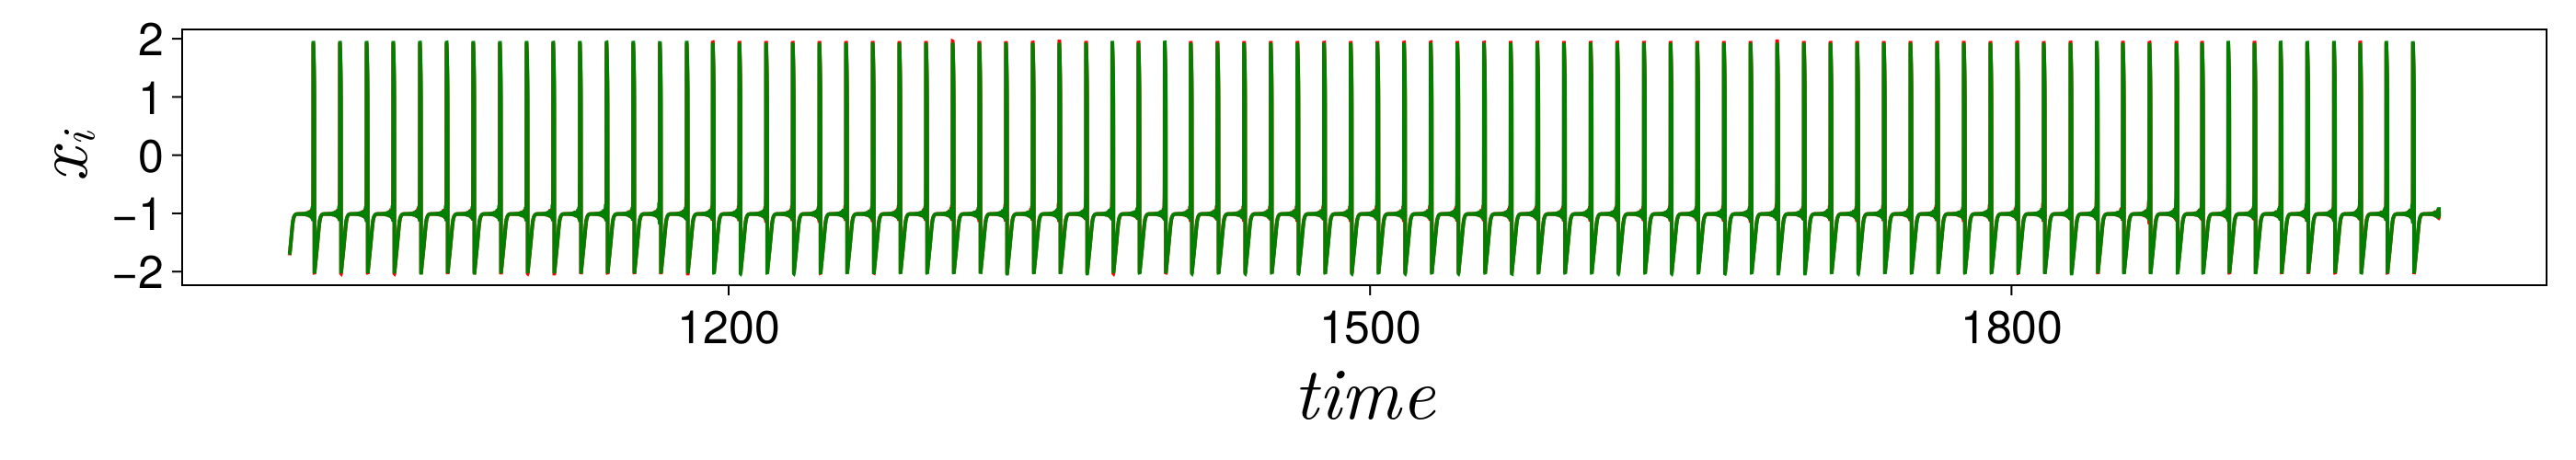

CairoMakie.Screen{IMAGE}


In [6]:
len = length(sol)
tstart = floor(Int64, len/2); tend = len
f = Figure(size = (1400, 250))
ax = Axis(f[1,1], xlabel = L"time", ylabel = L"x_i", xlabelsize = labelsize, ylabelsize = labelsize, xticklabelsize = ticksize, yticklabelsize = ticksize, xgridvisible = false, ygridvisible = false)
lines!(ax, sol.t[tstart:tend], sol[indexx, tstart:tend], color = :red, linewidth = lw)
lines!(ax, sol.t[tstart:tend], sol[indexy, tstart:tend], color = :green, linewidth = lw)
display(f)

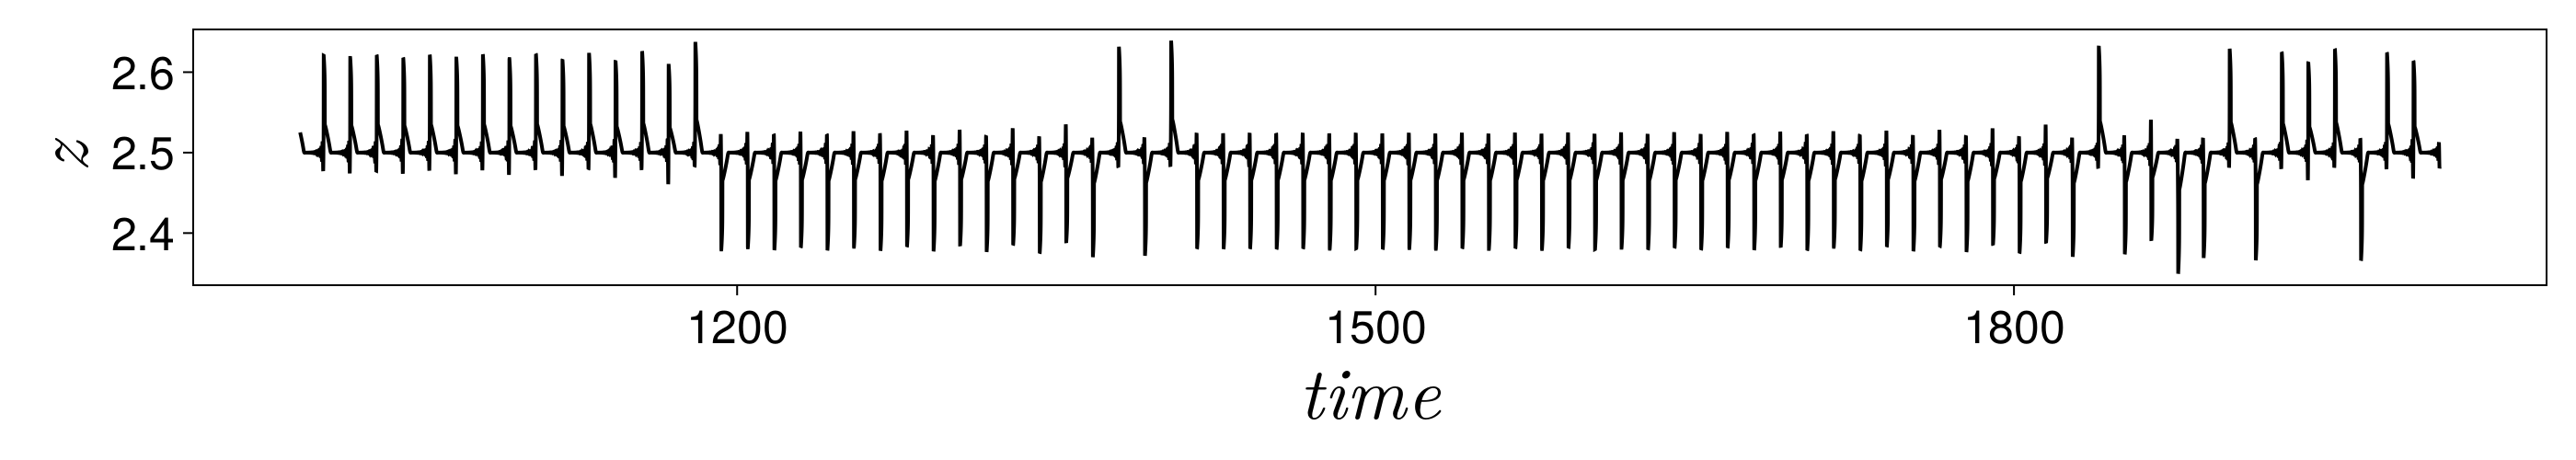

CairoMakie.Screen{IMAGE}


In [7]:
f = Figure(size = (1400, 250))
ax = Axis(f[1,1], xlabel = L"time", ylabel = L"z", xlabelsize = labelsize, ylabelsize = labelsize, xticklabelsize = ticksize, yticklabelsize = ticksize, xgridvisible = false, ygridvisible = false)
lines!(ax, sol.t[tstart:tend], sol[5, tstart:tend], color = :black, linewidth = lw)
display(f)

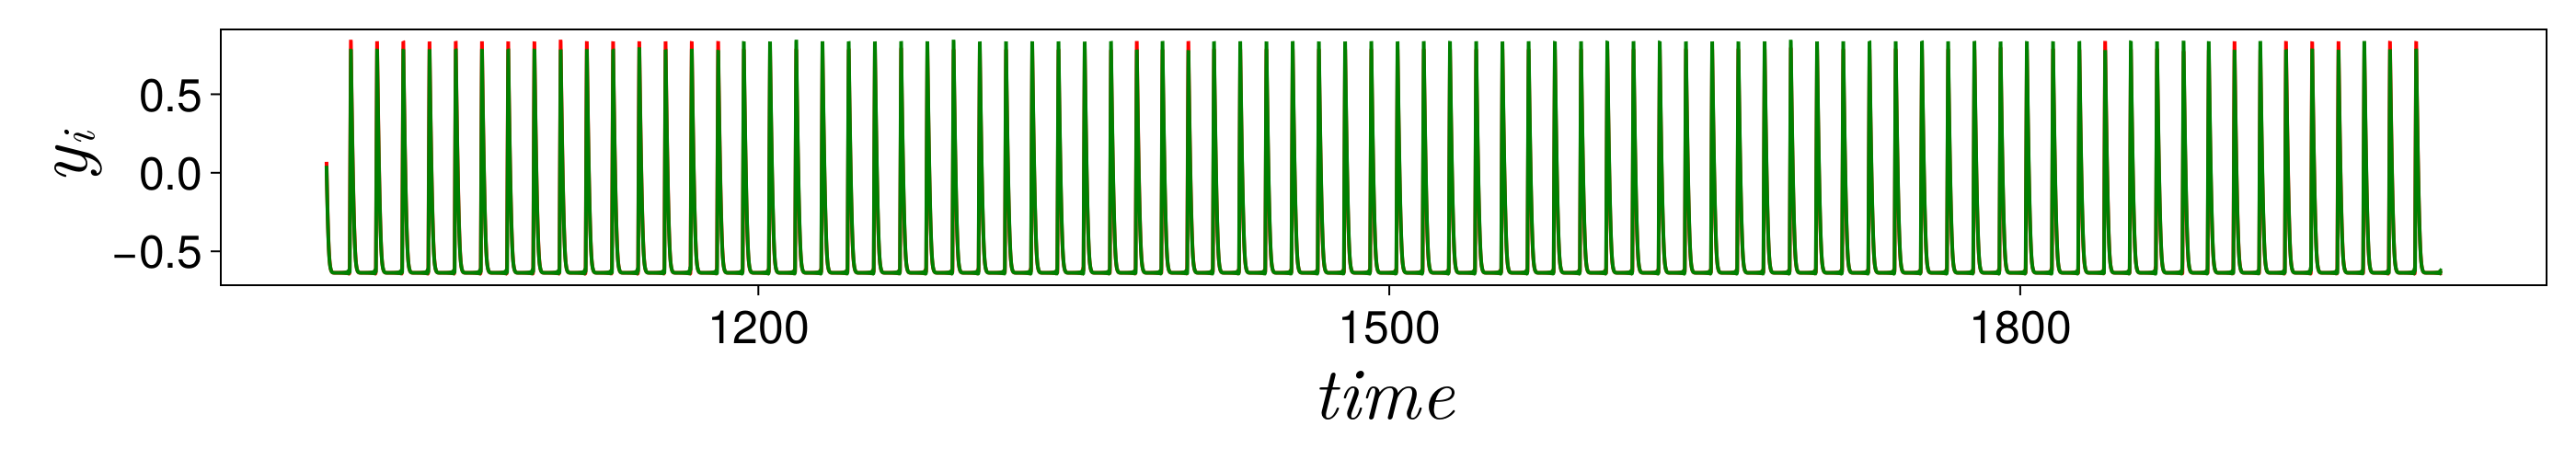

CairoMakie.Screen{IMAGE}


In [8]:
f = Figure(size = (1400, 250))
ax = Axis(f[1,1], xlabel = L"time", ylabel = L"y_i", xlabelsize = labelsize, ylabelsize = labelsize, xticklabelsize = ticksize, yticklabelsize = ticksize, xgridvisible = false, ygridvisible = false)
lines!(ax, sol.t[tstart:tend], sol[2, tstart:tend], color = :red, linewidth = lw)
lines!(ax, sol.t[tstart:tend], sol[4, tstart:tend], color = :green, linewidth = lw)
display(f)

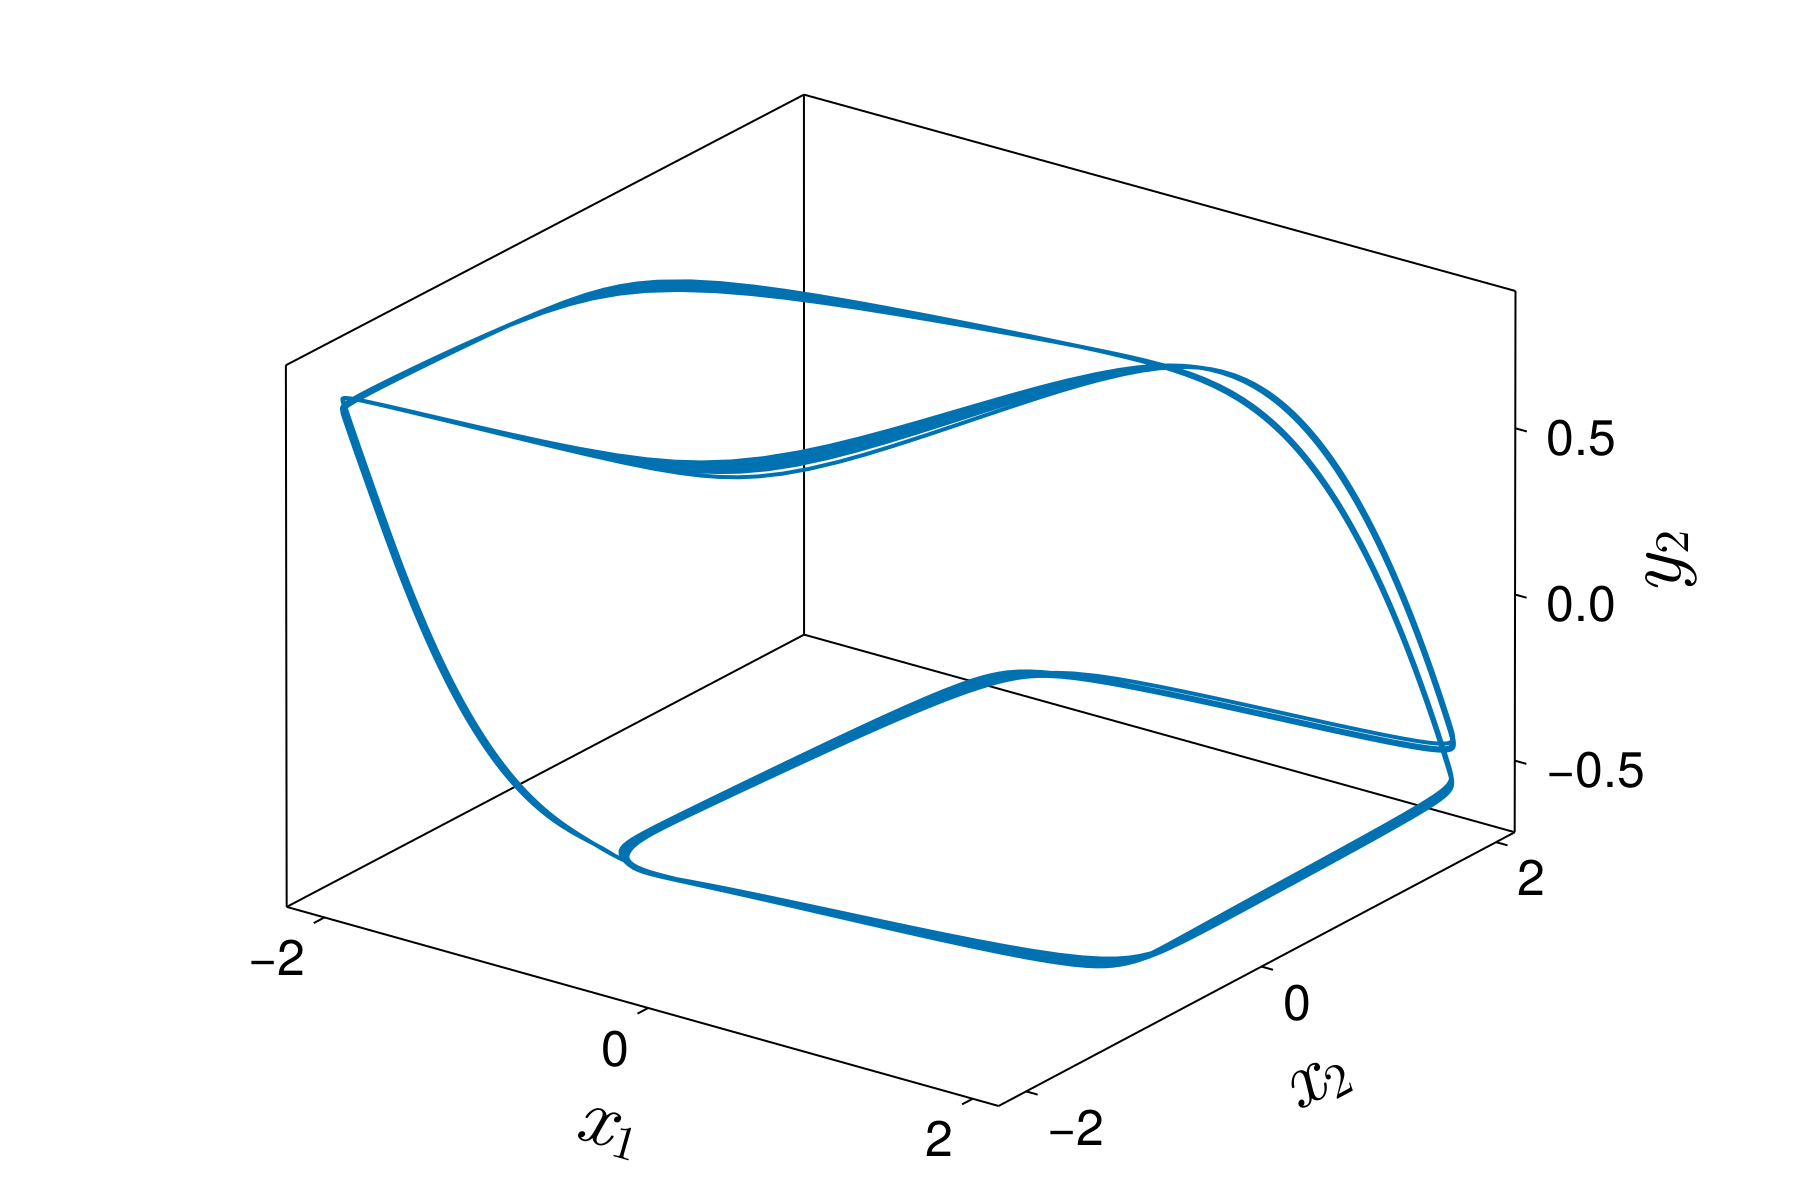

CairoMakie.Screen{IMAGE}


In [9]:
az = -0.3pi
f = Figure(size = (900, 600))
ax3d = Axis3(f[1, 1], xlabel = L"x_1", ylabel = L"x_2", zlabel = L"y_2", xlabelsize = labelsize, ylabelsize = labelsize, zlabelsize = labelsize,
    xticks = [-2, 0, 2], yticks = [-2, 0, 2], xticklabelsize = ticksize, yticklabelsize = ticksize, zticklabelsize = ticksize,
    azimuth = az, xgridvisible = false, ygridvisible = false, zgridvisible = false)
lines!(ax3d, sol[1, tstart:tend], sol[3, tstart:tend], sol[indexz, tstart:tend], linewidth = lw)
display(f)

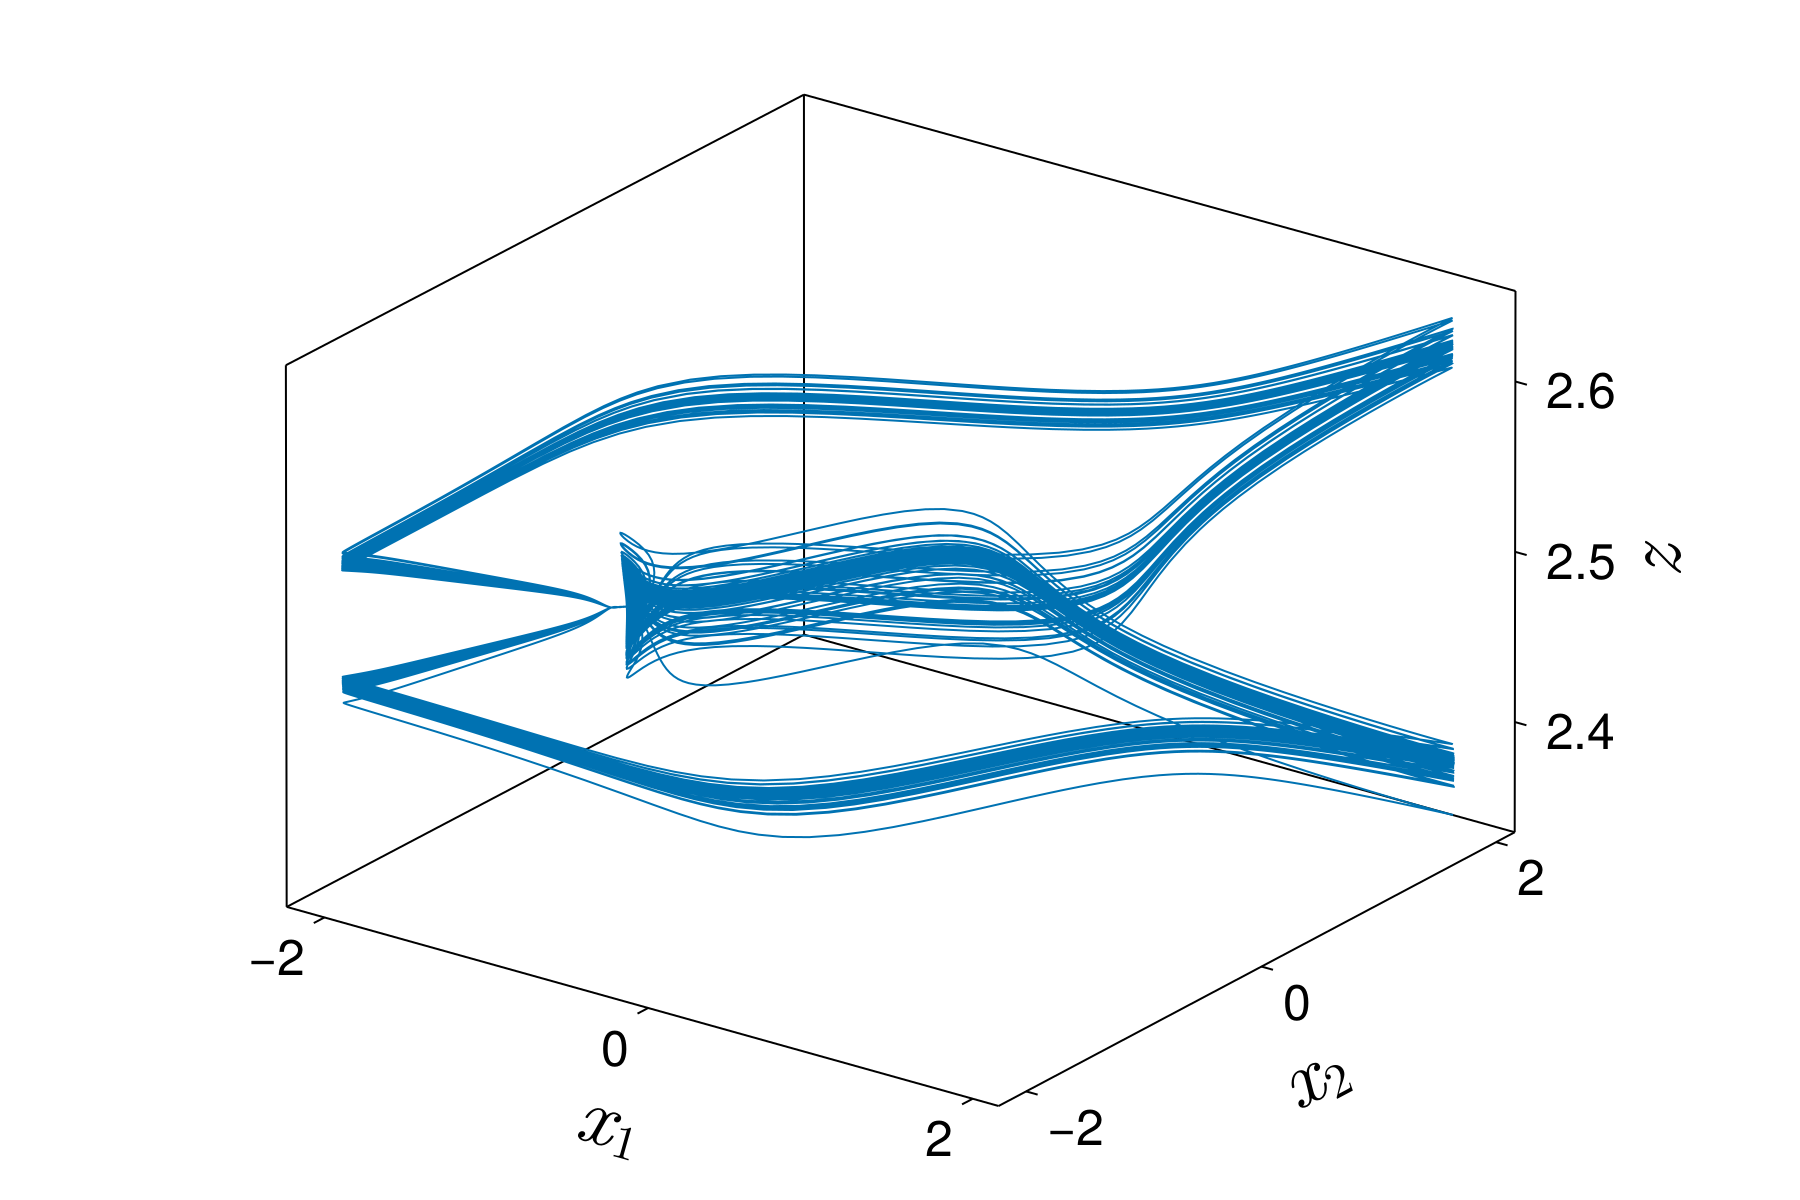

CairoMakie.Screen{IMAGE}


In [10]:
az = -0.3pi
f = Figure(size = (900, 600))
ax3d = Axis3(f[1, 1], xlabel = L"x_1", ylabel = L"x_2", zlabel = L"z", xlabelsize = labelsize, ylabelsize = labelsize, zlabelsize = labelsize,
    xticks = [-2, 0, 2], yticks = [-2, 0, 2], xticklabelsize = ticksize, yticklabelsize = ticksize, zticklabelsize = ticksize,
    azimuth = az, xgridvisible = false, ygridvisible = false, zgridvisible = false)
lines!(ax3d, sol[1, tstart:tend], sol[3, tstart:tend], sol[5, tstart:tend], linewidth = 1.0)
display(f)

In [11]:
integ_set = (alg = RK4(), adaptive = false, dt = 0.001)
ds = CoupledODEs(FHN2_try3, sol[end], parameters, diffeq = integ_set)
pmap = PoincareMap(ds, (4, 0.0))

tr, trange = trajectory(pmap, 100000)

tstartpo = 1; tendpo= 100000

In [ ]:
tstartpo = 10000; tendpo= 100000

f = Figure(size = (450, 450))
ax = Axis(f[1, 1],
xlabel = L"x_1", ylabel = L"x_2", xlabelsize = labelsize, ylabelsize = labelsize,
xticklabelsize = ticksize, yticklabelsize = ticksize)
scatter!(tr[tstartpo:tendpo, 1], tr[tstartpo:tendpo, 3], color = :red, markersize = 1.0)
xlims!(1.645, 1.85)
ylims!(1.725, 1.765)
display(f)

In [ ]:
tstartpo = 1; tendpo= 50000

f = Figure(size = (450, 450))
ax = Axis(f[1, 1], xgridvisible = false, ygridvisible = false,
xlabel = L"x_1", ylabel = L"x_2", xlabelsize = labelsize, ylabelsize = labelsize,
xticklabelsize = ticksize, yticklabelsize = ticksize,
xticks = [1.786, 1.788, 1.79], yticks = [1.7407, 1.74075, 1.7408], ytickformat = "{:.5f}")

scatter!(tr[tstartpo:tendpo, 1], tr[tstartpo:tendpo, 3], color = :red, markersize = 1.0)
xlims!(1.786, 1.79)
ylims!(1.74065, 1.74085)
display(f)

In [ ]:
#save("poincare_k1_009_zoom.svg", f)

In [ ]:
tstartpo = 1; tendpo= 50000

f = Figure(size = (450, 450))
ax = Axis(f[1, 1], xgridvisible = false, ygridvisible = false,
xlabel = L"x_1", ylabel = L"x_2", xlabelsize = labelsize, ylabelsize = labelsize,
xticklabelsize = ticksize, yticklabelsize = ticksize)

scatter!(ax, tr[tstartpo:tendpo, 1], tr[tstartpo:tendpo, 3], color = :red, markersize = 1.0)
xlims!(ax, 1.65, 1.815)
ylims!(ax, 1.735, 1.745)

ax2 = Axis(f, bbox = BBox(195, 340, 295, 425),
    xticklabelsize = 15, yticklabelsize = 15,
    xticks = [1.788, 1.79], yticks = [1.74075, 1.74085], ytickformat = "{:.4f}",
    xgridvisible = false, ygridvisible = false)

scatter!(tr[tstartpo:tendpo, 1], tr[tstartpo:tendpo, 3], color = :red, markersize = 1.0)
xlims!(ax2, 1.788, 1.79)
ylims!(ax2, 1.74075, 1.74085)


lines!(ax, [1.788, 1.79], [1.74075, 1.74075], color = :black, linewidth = 1.5)
lines!(ax, [1.788, 1.79], [1.74085, 1.74085], color = :black, linewidth = 1.5)
lines!(ax, [1.788, 1.788], [1.74075, 1.74085], color = :black, linewidth = 1.5)
lines!(ax, [1.79, 1.79], [1.74075, 1.74085], color = :black, linewidth = 1.5)

lines!(ax, [1.7628, 1.788], [1.7409, 1.74075], color = :black)
lines!(ax, [1.7628, 1.79], [1.74475, 1.74085], color = :black)

display(f)

In [ ]:
#save("poincare_with_insert.pdf", f)

In [ ]:
tstartpo = 1; tendpo= 50000

f = Figure(size = (450, 450))
ax = Axis(f[1, 1], xgridvisible = false, ygridvisible = false,
xlabel = L"x_1", ylabel = L"x_2", xlabelsize = labelsize, ylabelsize = labelsize,
xticklabelsize = 12, yticklabelsize = 12, ytickformat = "{:.5f}")

scatter!(tr[tstartpo:tendpo, 1], tr[tstartpo:tendpo, 3], color = :red, markersize = 1.0)
xlims!(1.7954, 1.7956)
ylims!(1.741116, 1.741128)
display(f)